In [11]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/laptop_prices.csv")

In [13]:
df.rename(columns={'RAM (GB)': 'RAM_GB' , 'Screen Size (inch)' : 'Screen_Size_inch' , 'Battery Life (hours)' : 'Battery_Life_hours' ,
                   'Weight (kg)' : 'Weight_kg','Operating System' : 'Operating_System' , 'Price ($)' : 'Price_USD'},inplace=True)

In [14]:
df.head(5)

,Brand,Processor,RAM_GB,Storage,GPU,Screen_Size_inch,Resolution,Battery_Life_hours,Weight_kg,Operating_System,Price_USD
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Brand               11768 non-null  object 
 1   Processor           11768 non-null  object 
 2   RAM_GB              11768 non-null  int64  
 3   Storage             11768 non-null  object 
 4   GPU                 11768 non-null  object 
 5   Screen_Size_inch    11768 non-null  float64
 6   Resolution          11768 non-null  object 
 7   Battery_Life_hours  11768 non-null  float64
 8   Weight_kg           11768 non-null  float64
 9   Operating_System    11768 non-null  object 
 10  Price_USD           11768 non-null  float64
dtypes: float64(4), int64(1), object(6)
memory usage: 1011.4+ KB


In [16]:
df.shape

(11768, 11)

In [17]:
df.describe()

,RAM_GB,Screen_Size_inch,Battery_Life_hours,Weight_kg,Price_USD
count,11768.000000,11768.000000,11768.000000,11768.000000,11768.000000
mean,24.852821,15.212305,8.027855,2.341117,2183.571608
std,21.762567,1.436997,2.305400,0.667921,1316.886132
min,4.000000,13.300000,4.000000,1.200000,279.570000
25%,8.000000,14.000000,6.000000,1.760000,1272.045000
50%,16.000000,15.600000,8.000000,2.340000,1840.865000
75%,32.000000,16.000000,10.000000,2.910000,2698.370000
max,64.000000,17.300000,12.000000,3.500000,10807.880000


In [18]:
df.isna().sum()

,0
Brand,0
Processor,0
RAM_GB,0
Storage,0
GPU,0
Screen_Size_inch,0
Resolution,0
Battery_Life_hours,0
Weight_kg,0
Operating_System,0


In [19]:
df.duplicated().sum()

np.int64(0)

-- No null or duplicate values

Applying log on target column to improve mse and r2 for better linear regression

In [20]:
df['Price_USD'] = np.log1p(df['Price_USD'])

-- Storage column conversion

In [21]:
# Extract SSD values
ssd_gb = df['Storage'].str.extract(r'(\d+)GB SSD|(\d+)TB SSD')
df['Storage_SSD_GB'] = ssd_gb[0].fillna(0).astype(int) + ssd_gb[1].fillna(0).astype(int) * 1000

# Extract HDD values
hdd_gb = df['Storage'].str.extract(r'(\d+)GB HDD|(\d+)TB HDD')
df['Storage_HDD_GB'] = hdd_gb[0].fillna(0).astype(int) + hdd_gb[1].fillna(0).astype(int) * 1000
df.drop(columns=['Storage'], inplace=True)

<ipython-input-21-39e9185b2e6f>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Storage_HDD_GB'] = hdd_gb[0].fillna(0).astype(int) + hdd_gb[1].fillna(0).astype(int) * 1000


In [22]:
df['Storage_SSD_GB']

,Storage_SSD_GB
0,512
1,1000
2,2000
3,256
4,256
...,...
11763,2000
11764,2000
11765,2000
11766,512


-- Resolution column conversion

In [23]:
df['Resolution'] = df['Resolution'].str.split('x').apply(lambda x:int(x[0])*int(x[1]))

***ENCODING***

In [24]:
from sklearn.preprocessing import OneHotEncoder

In [25]:
categorical_attr= ['Brand','Processor','GPU','Operating_System']

In [26]:
encoder= OneHotEncoder(drop='first',sparse_output=False)
encoder_features= encoder.fit_transform(df[categorical_attr])

In [27]:
encoded_df=pd.DataFrame(encoder_features,columns=encoder.get_feature_names_out())

In [28]:
df=pd.concat([encoded_df,df.drop(columns=categorical_attr)],axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11768 entries, 0 to 11767
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Brand_Apple               11768 non-null  float64
 1   Brand_Asus                11768 non-null  float64
 2   Brand_Dell                11768 non-null  float64
 3   Brand_HP                  11768 non-null  float64
 4   Brand_Lenovo              11768 non-null  float64
 5   Brand_MSI                 11768 non-null  float64
 6   Brand_Microsoft           11768 non-null  float64
 7   Brand_Razer               11768 non-null  float64
 8   Brand_Samsung             11768 non-null  float64
 9   Processor_AMD Ryzen 5     11768 non-null  float64
 10  Processor_AMD Ryzen 7     11768 non-null  float64
 11  Processor_AMD Ryzen 9     11768 non-null  float64
 12  Processor_Intel i3        11768 non-null  float64
 13  Processor_Intel i5        11768 non-null  float64
 14  Proces

#### Training the model

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
Y=df.Price_USD
X=df.drop(['Price_USD'],axis=1)

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

In [33]:
X_train.shape , Y_train.shape

((9414, 32), (9414,))

In [34]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

#### Implementing linear regression

In [35]:
model=linear_model.LinearRegression()

In [36]:
model.fit(X_train,Y_train)

LinearRegression()

In [37]:
Y_pred=model.predict(X_test)

In [38]:
print("Co-eficients: ", model.coef_)
print("Intercept: ", model.intercept_)
print(f"Mean square error: {mean_squared_error(Y_test,Y_pred):.2f}")
print(f"R square : {r2_score(Y_test,Y_pred):.2f}")

Co-eficients:  [ 4.02856237e-01  5.36400891e-03  3.20338664e-03  4.09499831e-03
  9.82581072e-03  2.66949458e-01  8.33220143e-03  3.31198257e-01
  8.39285129e-03  1.78472729e-01  3.91099989e-01  6.78458883e-01
 -4.60292968e-04  1.77586822e-01  3.97611494e-01  6.76431367e-01
 -2.28464027e-04 -3.87921503e-01  7.61611607e-03  4.24769362e-03
  4.86090086e-04  3.67539464e-03  2.81814312e-04  2.18287128e-03
  1.76440443e-03  1.56852706e-02  2.95718594e-02  8.81623140e-08
 -3.74522212e-04 -1.23280742e-03 -6.80088571e-08 -1.78954331e-04]
Intercept:  6.037535280342085
Mean square error: 0.01
R square : 0.97


In [39]:
print(f"Root Mean square error: {np.sqrt(mean_squared_error(Y_test,Y_pred)):.2f}")

Root Mean square error: 0.10


RMSE is good for expensive laptops, but not for cheap laptops
-- prices are in range of 270K to 10k in dollars

In [40]:
df['Price_USD'].describe()

,Price_USD
count,11768.000000
mean,7.535140
std,0.549609
min,5.636823
25%,7.149167
50%,7.518534
75%,7.900774
max,9.288123


In [41]:
train_r2=model.score(X_train,Y_train)
test_r2=model.score(X_test,Y_test)
print(f"Train {train_r2 : .2f}")
print(f"test {test_r2 : .2f}")

Train  0.97
test  0.97


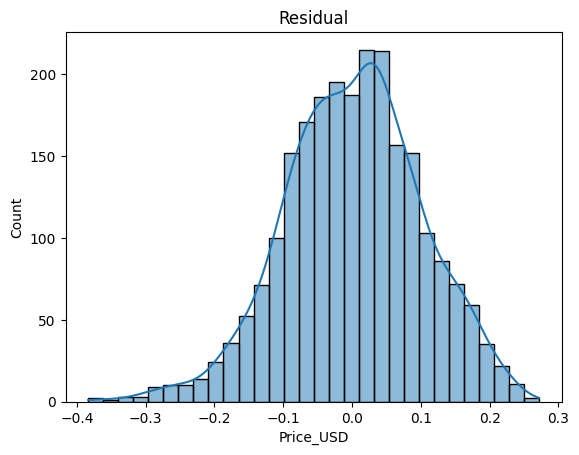

In [42]:
residuals = Y_test - Y_pred
sns.histplot(residuals, bins=30, kde=True)
plt.title("Residual")
plt.show()

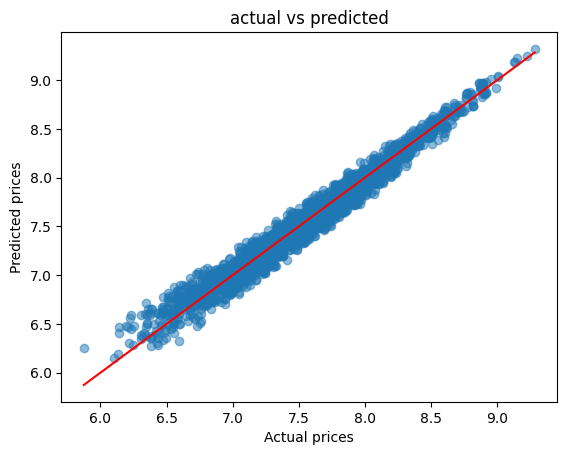

In [43]:
plt.scatter(Y_test,Y_pred, alpha=0.5)
x_range=np.linspace(min(Y_test),max(Y_test),100)
plt.plot(x_range,x_range,color="red",label="perfect fit line")
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("actual vs predicted")
plt.show()

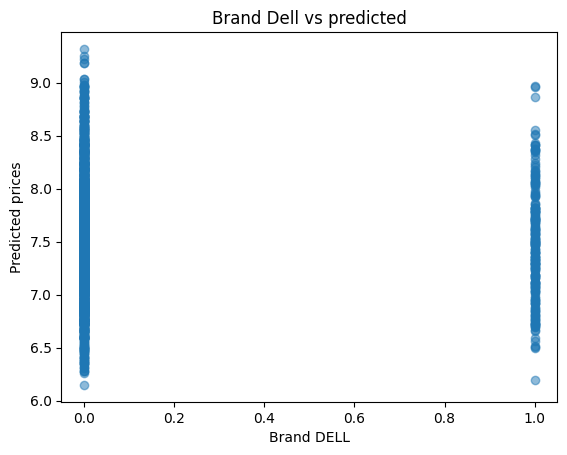

In [44]:
plt.scatter(X_test["Brand_Dell"],Y_pred, alpha=0.5)
plt.xlabel("Brand DELL")
plt.ylabel("Predicted prices")
plt.title("Brand Dell vs predicted")
plt.show()

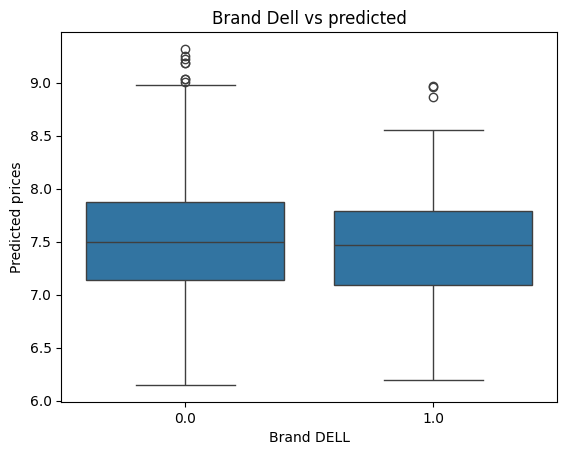

In [45]:
sns.boxplot(x=X_test["Brand_Dell"],y=Y_pred)
plt.xlabel("Brand DELL")
plt.ylabel("Predicted prices")
plt.title("Brand Dell vs predicted")
plt.show()

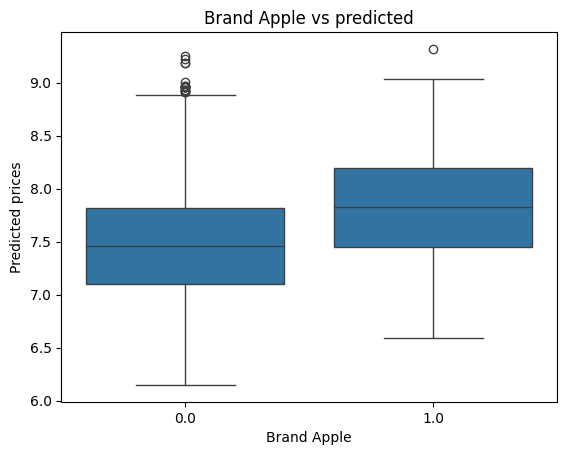

In [46]:
sns.boxplot(x=X_test["Brand_Apple"],y=Y_pred)
plt.xlabel("Brand Apple")
plt.ylabel("Predicted prices")
plt.title("Brand Apple vs predicted")
plt.show()

In [47]:
Y_pred_original = np.exp(Y_pred)
rmse_original = np.sqrt(mean_squared_error(np.exp(Y_test), Y_pred_original))
r2_original = r2_score(np.exp(Y_test), Y_pred_original)

print(f"Original RMSE: {rmse_original:.2f}")
print(f"Original R²: {r2_original:.2f}")

Original RMSE: 206.34
Original R²: 0.98


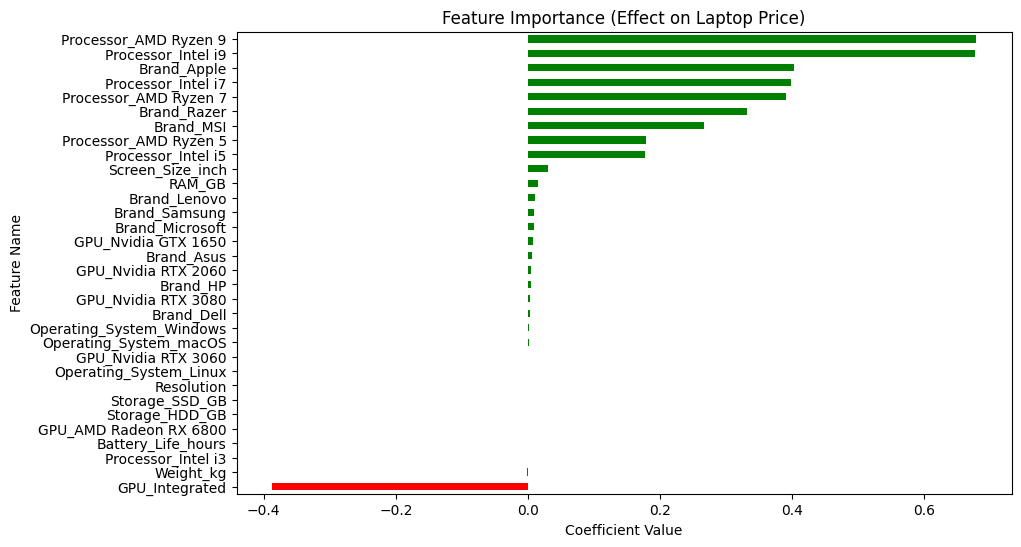

In [48]:
import matplotlib.pyplot as plt

feature_importance = pd.Series(model.coef_, index=X_train.columns).sort_values()
plt.figure(figsize=(10, 6))
feature_importance.plot(kind='barh', color=['green' if x > 0 else 'red' for x in feature_importance])
plt.title("Feature Importance (Effect on Laptop Price)")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature Name")
plt.show()
